# TP Proyecto Genoma Humano - Principal Components Analysis
## Métodos cuantitativos para las ciencias sociales y negocios

## Integrantes
Austerlitz, Lisandro\
Diribarne, Waldemar\
Junghanss, Juan Cruz\
López Mondo, Ezequiel\
Marco, Tomás



In [3]:
import numpy as np
from numpy import linalg as LA
# https://numpy.org/doc/stable/reference/routines.linalg.html
from statistics import mode 
# https://numpy.org/doc/stable/reference/routines.statistics.html


import scipy
from scipy import linalg
# https://docs.scipy.org/doc/scipy/reference/linalg.html
from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/stats.html

import random
import time

from scipy.linalg import eigh

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image

In [5]:
# Primero convierta los datos del archivo de las nucleobases a una matriz real

data_dir = '0 Métodos cuantitativos'
#carpeta en la que esta guardado el file p4dataset2020.txt relativo al JN, DENTRO del JN
data_filename = 'p4dataset2020.txt'

n_cols = 10101 #variables
n_rows = 995 #personas
n_metadata_cols = 3 #id de la persona, sexo, y código de región


X = np.zeros((n_rows, n_cols))
metadata = np.zeros((n_rows, n_metadata_cols))
print(X)
print(X.shape)
print(metadata)
print(metadata.shape)
#Hasta acá son todos ceros, crea matrices de 995x10101 y 995x3 (filas x columnas) para después reemplazar en ellas los valores


# abrir este file y llamarlo f https://www.pythonforbeginners.com/files/reading-and-writing-files-in-python
with open(data_filename, 'r') as f:   
  # remove last empty element from last '\n' split
  lines = f.read().split("\n")[:-1]
  metadata = np.array([line.split(" ")[:n_metadata_cols] for line in lines])
  data = np.array([line.split(" ")[n_metadata_cols:] for line in lines])
  modes = [mode(data[:, j]) for j in range(0, n_cols)]
  for i in range(0, n_rows):
    X[i,:] = (modes != data[i,:])
    # para cada elemento de la fila i asigna un 1 si el elemento no es = mode
    # y un 0 si es igual

print(X.shape)
print(metadata.shape)
np.save('X.npy', X) #acá estás bajando los archivos que creaste arriba
np.save('metadata.npy', metadata)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(995, 10101)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(995, 3)
(995, 10101)
(995, 3)


In [6]:
X = np.load('X.npy') # cargás el archivo que bajaste la celda anterior
X -= np.mean(X, axis = 0) # centrando los datos, le restás la media a todo así la media queda en 0

In [7]:
#Unrelated, Prueba del operador -= https://stackoverflow.com/questions/37845445/and-symbols-in-python/37845498
A = 1
B = 3
print(A, B)
A -= B
print(A)

1 3
-2


In [8]:
metadata = np.load('metadata.npy')

In [9]:
# creamos el diccionario code_G_dict para la metadata correspondiente a la
# hubicacion geografica: ver
# https://www.internationalgenome.org/faq/which-populations-are-part-your-study/
metadata
metadata.shape
codes = metadata[:,2] #nombramos la 3ra columna [2] de la metadata "code" para ponerle los codes de las regiones que trabajemos
#recordar que la primera columna [0] es el código de la persona y la segunda [1] es el sexo (1=h, 2=m)

#print(codes)
print(codes.shape)

code_dict = {}
for code in codes:
    code_dict[code] = [c == code for c in codes]
# Esto crea un diccionario donde cada codigo geografico es una key, y a cada
# key le asigna una lista de 0s (False) y 1s (True)
# el elemento i-esimo de esta lista es 1 si la persona i-esima
# es de a esa zona y un 0 si es de otra zona

print(code_dict.keys()) # lista de keys, o codigos geograficos
#print(code_dict) me devuelve todos booleanos

# podemos crear un vector para cada key con la lista asociada. Por ejemplo:

ACB = np.asarray(code_dict["ACB"])
print(ACB.shape) # la shape es (995,), los elementos son T o F
print(ACB[:10]) # muestra los primeros 10 
print(np.mean(ACB)) # 12.26% de la gente es de ACB
print(1.0/7) # hay 7 codigos diferentes, ésto es para ver que sean representativos
print(ACB*1) #la quiero ver con números, cuando hacemos operaciones sobre un bool se transforman en número, 1=true, 0=false.

(995,)
dict_keys(['ACB', 'GWD', 'ESN', 'MSL', 'YRI', 'LWK', 'ASW'])
(995,)
[ True  True  True  True  True  True  True  True  True  True]
0.12261306532663317
0.14285714285714285
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

#### YRI = Yoruba in Ibadan, Nigeria
#### LWK	= Luhya in Webuye, Kenya
#### GWD	= Gambian in Western Divisions in the Gambia
#### MSL	= Mende in Sierra Leone
#### ESN	= Esan in Nigeria
#### ASW	= Americans of African Ancestry in SW USA
#### ACB	= African Caribbeans in Barbados

In [10]:
#Unrelated, Prueba: Operador [:] en listas ¿Qué hace? https://docs.python.org/3/tutorial/introduction.html#lists
Abecedario = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
print(Abecedario[3:]) #te muestra todos los elementos menos los primeros 3
print(Abecedario[:3]) #te muestra los primeros 3 elementos
print(Abecedario[:]) #te muestra todos los elementos
print(Abecedario[-3:]) #te muestra los últimos 3 elementos
print(Abecedario[:-3]) #te muestra todos los elementos menos los últimos 3
print(Abecedario[:0]) #no te muestra nada

['d', 'e', 'f', 'g', 'h', 'i']
['a', 'b', 'c']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
['g', 'h', 'i']
['a', 'b', 'c', 'd', 'e', 'f']
[]


In [11]:
A = np.dot(X.T,X)/n_rows # construimos la matriz varianza-covarianza

In [12]:
# A saber para la cell siguiente https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html

# La línea para sacar eigenvalues 
# subset_by_value :  iterable, optional ----->>  Te recorta la matriz entre los valores que ponés
print(A)
print()
print(A.shape)
print('n_cols-3 es ' + str(n_cols-3))
print('n_cols-1 es ' + str(n_cols-1))
# Es decir, se piden los eigenvalues de la matriz var-cov (que se llama A), entre los valores (10098, 10100)

[[ 2.19242948e-01 -1.47965960e-02  8.94522866e-03 ...  3.78778314e-04
   6.78770738e-04 -1.42420646e-04]
 [-1.47965960e-02  2.24303427e-01 -1.51955759e-02 ...  1.30804778e-03
  -3.41405520e-04  2.53932981e-03]
 [ 8.94522866e-03 -1.51955759e-02  2.22667104e-01 ... -6.76750587e-04
   6.68669983e-04 -3.64637257e-04]
 ...
 [ 3.78778314e-04  1.30804778e-03 -6.76750587e-04 ...  4.99987374e-03
  -5.05037752e-06 -1.11108305e-04]
 [ 6.78770738e-04 -3.41405520e-04  6.68669983e-04 ... -5.05037752e-06
   1.00401505e-03 -2.22216611e-05]
 [-1.42420646e-04  2.53932981e-03 -3.64637257e-04 ... -1.11108305e-04
  -2.22216611e-05  2.16216762e-02]]

(10101, 10101)
n_cols-3 es 10098
n_cols-1 es 10100


In [13]:
# extraemos los 3 autovalores mas grandes de A y sus autovectores 
start_time = time.time() # medimos el tiempo que tarda
w, v = scipy.linalg.eigh(A, subset_by_index=[n_cols-3, n_cols-1])
print(time.time() - start_time, "segundos") #190 segundos la primera vez que corrió, 299 la 2da, 169 la 3ra 

223.210346698761 segundos


In [14]:
#Unrelated: Timer.
#Función time
start_timer = time.time()
finish_timer = time.time()
print(start_timer , "segundos")
print(finish_timer , "segundos") #start_timer finish_timer son iguales cuando se los imprime porque ese es el punto de partida
#Cuando uno introduce una función pesada en el medio, el valor de start se resta del finish y quedan los segundos que tardaron
#las líneas de en medio en correr
print(finish_timer-start_timer , "segundos")

1620837902.7480032 segundos
1620837902.7589939 segundos
0.010990619659423828 segundos


In [15]:
#Unrelated: Repaso sobre cómo funciona la función de eigenvalues.
prueba = np.array([[2, 1, 1],
          [2, 3, 2],
          [3, 3, 4]])
print(prueba)
#autovalores, autovectores = scipy.linalg.eig( nombre de la matriz)
autovalores, autovectores = scipy.linalg.eig(prueba)
print('autovalores')
print(autovalores.shape) # autovalores 
print(autovalores)
print('autovectores')
print(autovectores.shape) # autovectores
print(autovectores)
identidad = np.array([[1,0,0],
                      [0,1,0],
                      [0,0,1]])
print(identidad)
autovalor0 = autovalores[0]
autovalor1 = autovalores[1]
autovalor2 = autovalores[2]
print('autovalores:' , autovalor0, autovalor1, autovalor2)
print('det = 0 si todo sale bien al restar los autovalores a la matriz original')
pru0 = prueba-identidad*autovalor0 
print(np.linalg.det(pru0)) 
pru1 = prueba-identidad*autovalor1 
print(np.linalg.det(pru1))
pru2 = prueba-identidad*autovalor2 
print(np.linalg.det(pru2)) #dan todos casi 0 (números infinitesimales)

[[2 1 1]
 [2 3 2]
 [3 3 4]]
autovalores
(3,)
[7.+0.j 1.+0.j 1.+0.j]
autovectores
(3, 3)
[[ 0.26726124  0.6933218   0.3065219 ]
 [ 0.53452248 -0.72012932 -0.80864881]
 [ 0.80178373  0.02680753  0.50212691]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
autovalores: (6.999999999999999+0j) (0.999999999999999+0j) (0.9999999999999997+0j)
det = 0 si todo sale bien al restar los autovalores a la matriz original
(2.3980817331903448e-14+0j)
(4.141519752410259e-30+0j)
(8.874685183736402e-31+0j)


In [16]:
#Volvemos al PCA
print('los valores de W son los autovalores/eigenvalues, ordenados de menor a mayor')
print(w.shape)
print(w)

print('las columnas de V son los autovectores/eigenvectors, correspondientes a los elementos del vector de autovalores')
print(v.shape)
print(v)

los valores de W son los autovalores/eigenvalues, ordenados de menor a mayor
(3,)
[ 8.85345851 10.98992228 13.48754945]
las columnas de V son los autovectores/eigenvectors, correspondientes a los elementos del vector de autovalores
(10101, 3)
[[ 0.00307852 -0.00645805 -0.00785323]
 [-0.00013714  0.01297281 -0.00040146]
 [ 0.00237463  0.00507936 -0.00247878]
 ...
 [ 0.00202784  0.0004754   0.00206653]
 [ 0.00034677 -0.00026621 -0.00020155]
 [ 0.01149078  0.00091702  0.01051819]]


In [17]:
# separamos los tres autovectores (columnas de v)
v_pca1 = v[:,2] #3ra
v_pca2 = v[:,1] #2da
v_pca3 = v[:,0] #1ra

In [18]:
#todos son vectores de 10101x1
print(v_pca1)
print(v_pca1.shape)
print(v_pca2)
print(v_pca2.shape)
print(v_pca3)
print(v_pca3.shape)

[-0.00785323 -0.00040146 -0.00247878 ...  0.00206653 -0.00020155
  0.01051819]
(10101,)
[-0.00645805  0.01297281  0.00507936 ...  0.0004754  -0.00026621
  0.00091702]
(10101,)
[ 0.00307852 -0.00013714  0.00237463 ...  0.00202784  0.00034677
  0.01149078]
(10101,)


#### Proyección de un vector sobre otro. 
Fórmula proyección de un vector U sobre un vector V:
$Proy_{v}U=\frac{U.V}{|V|^2}V$
Nosotros tenemos que proyectar todas las observaciones de la matriz X sobre la nueva base de Componentes Principales. $Proy_{(CP)_{i}}X=\frac{X.(CP)_{i}}{|(CP)_{i}|^2}(CP)_{i}$. Sabemos que $|CP_{i}|=1$, así que el denominador es 1.

$Proy_{(CP)_{i}}X=X.(CP)_{i}(CP)_{i}$

### En clase y en el notebook hicimos $X*CP_{i}$, cómo se cancela el 2do $CP_{i}$?

In [19]:
# proyectamos las 995 filas de X en la direccion de los
# autovectores v_pca1, v_pca2 y v_pca3
x1 = np.dot(X,v_pca1)
x2 = np.dot(X,v_pca2)
x3 = np.dot(X,v_pca3)

print(x1.shape, x2.shape, x3.shape) #son 995 porque había 995 personas (observaciones)

(995,) (995,) (995,)


# PC1 y PC2 

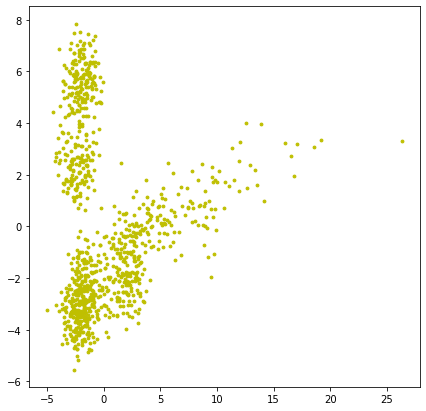

In [20]:
# Ejercicio 2: estudiamos x1 y x2
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x1, x2, s=8, c ="y") #las dos variables, el tamaño de los puntos, y el color

In [21]:
# vector para cada key (automatizar esto) https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
ACB = np.asarray(code_dict["ACB"])
GWD = np.asarray(code_dict["GWD"])
ESN = np.asarray(code_dict["ESN"])
MSL = np.asarray(code_dict["MSL"])
YRI = np.asarray(code_dict["YRI"])
LWK = np.asarray(code_dict["LWK"])
ASW = np.asarray(code_dict["ASW"]) 

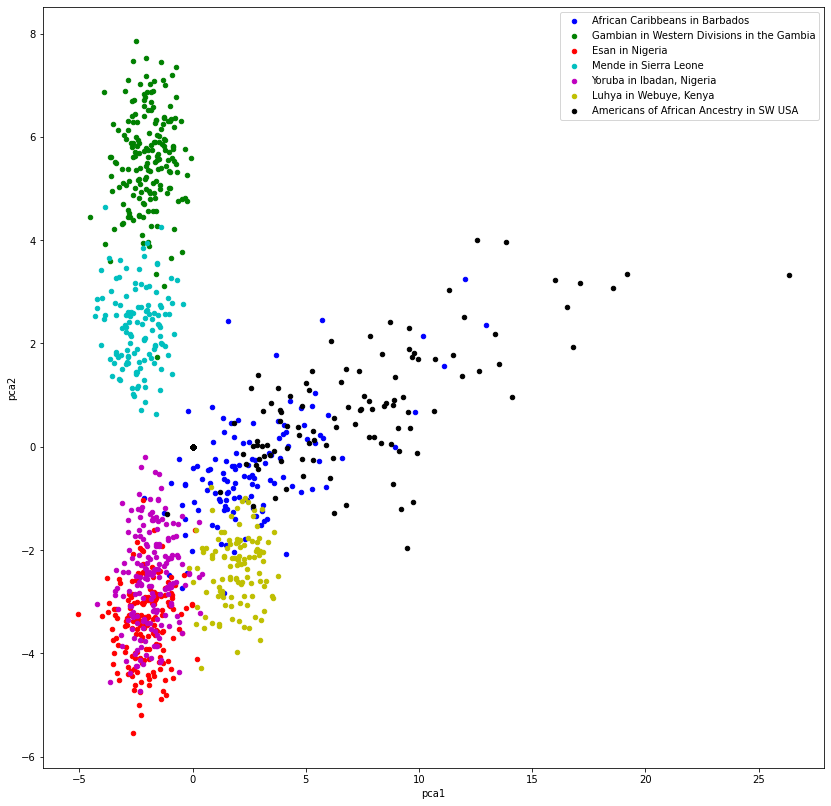

In [77]:
fig, ax = plt.subplots(figsize=(14,14))


ax.scatter(x1*ACB, x2*ACB, s=20, c ="b", label="African Caribbeans in Barbados")
ax.scatter(x1*GWD, x2*GWD, s=20, c ="g", label="Gambian in Western Divisions in the Gambia")
ax.scatter(x1*ESN, x2*ESN, s=20, c ="r", label="Esan in Nigeria")
ax.scatter(x1*MSL, x2*MSL, s=20, c ="c", label="Mende in Sierra Leone")
ax.scatter(x1*YRI, x2*YRI, s=20, c ="m", label="Yoruba in Ibadan, Nigeria")
ax.scatter(x1*LWK, x2*LWK, s=20, c ="y", label="Luhya in Webuye, Kenya")
ax.scatter(x1*ASW, x2*ASW, s=20, c ="k", label="Americans of African Ancestry in SW USA")

plt.xlabel("pca1")
plt.ylabel('pca2')
ax.legend()


plt.show()
fig.savefig("PC1y2.png")

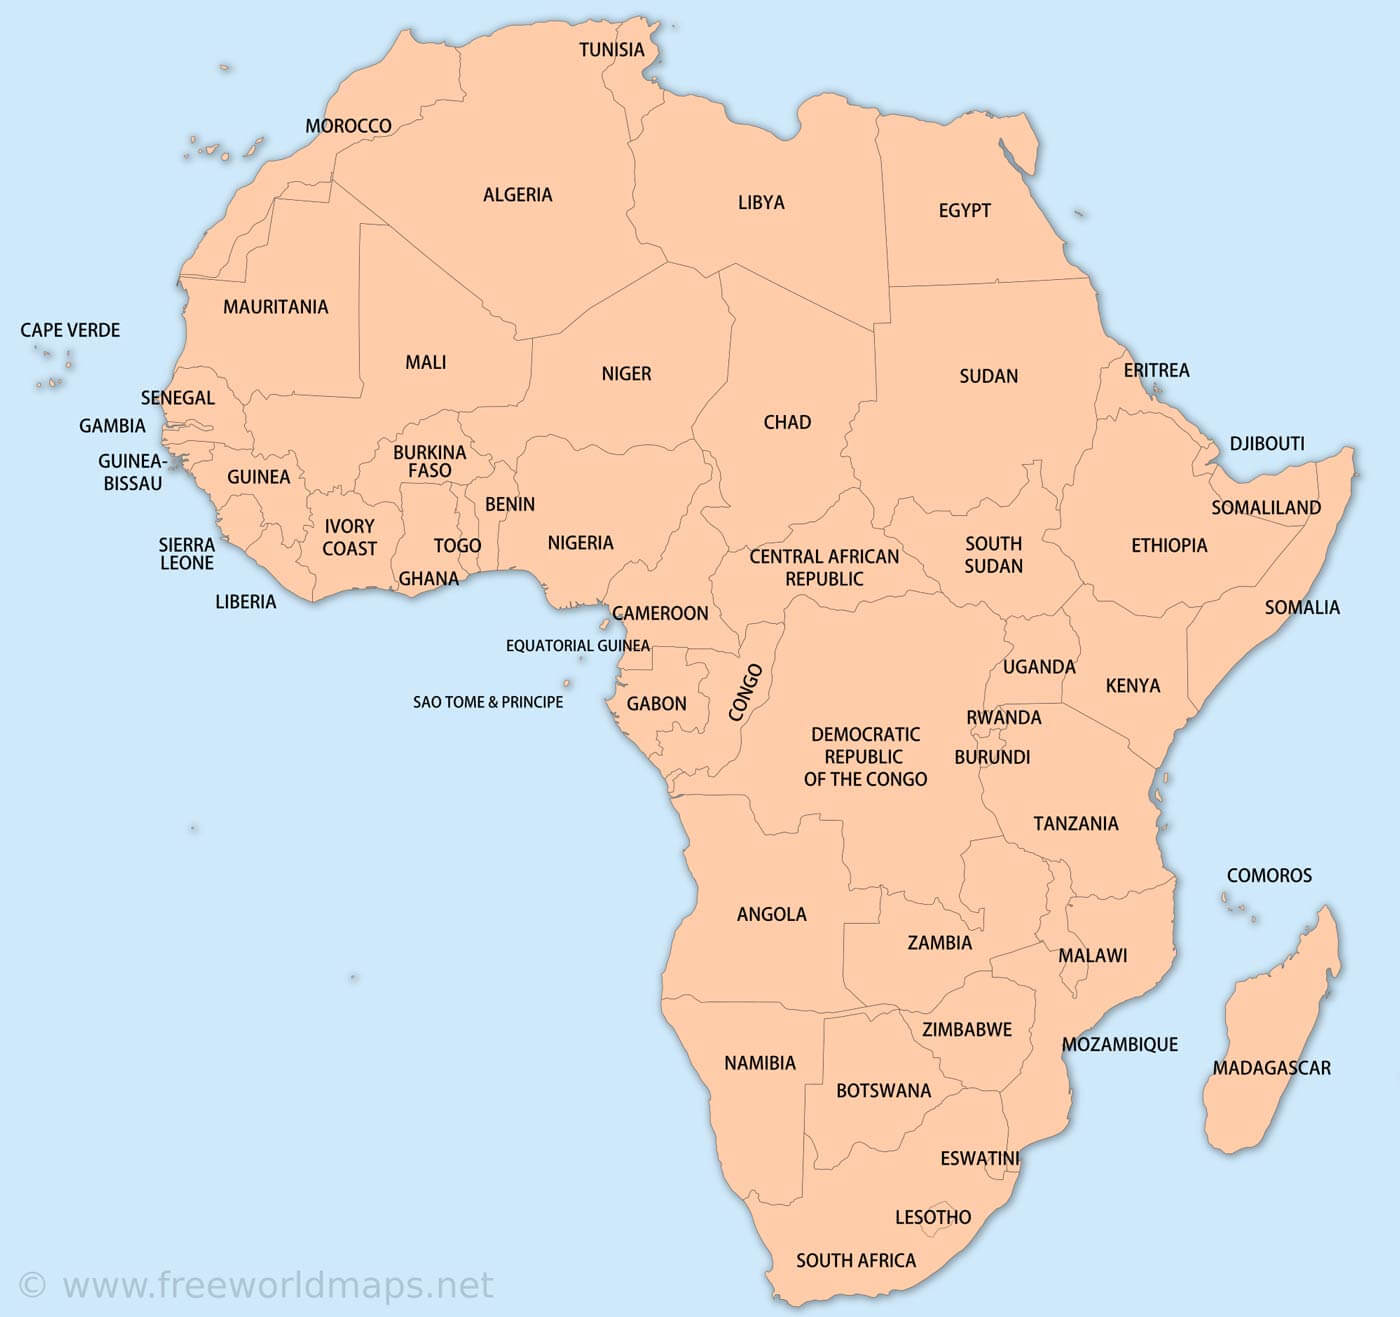

2) PC1y2.png\
3) En el gráfico con PC1 y PC2 se observa como ciertos clusters de data se agrupan en función de la región, en particular algunas son más cerradas/endogámicas que otras (destacan Gambia y Sierra Leona), mientras que en otras es más difusa la distribución de los genes. 

Comparamos con el mapa de África:\
Gambia (verde) y Sierra Leona (cyan) parecen estar ubicadas al noroeste, tanto en el gráfico como en la realidad.\
Kenya (amarillo) se encuentra en la costa este africana y a la vez en el borde derecho de la nube de datos.\
Las dos poblaciones tomadas de nigeria (rojo y rosa) se encuentran superpuestas, indicando mixogénesis entre ellas.\
Las dos poblaciones africanas emigrantes a las Américas; la americana (negro) y la de barbados (azul) parecen estar no solo superpuestas, lo que indica que hubo mestizaje entre sí, sino que más dispersas, indicando existencia de mestizaje con otros grupos étnicos presentes en las regiones que hoy día habitan, explicándose así la diferencia genética para con el resto de los afrodescendientes. Además, hay que mencionar que el comercio de esclavos con destino a América provenía en gran parte de África Central, por lo que tampoco están mal ubicados en el sector de la nube de dispersión donde están.  

# PC1 y PC3

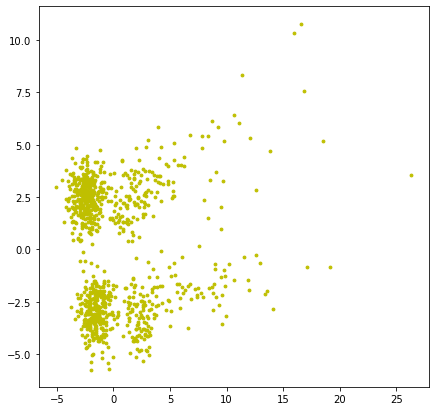

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x1, x3, s=8, c ="y")

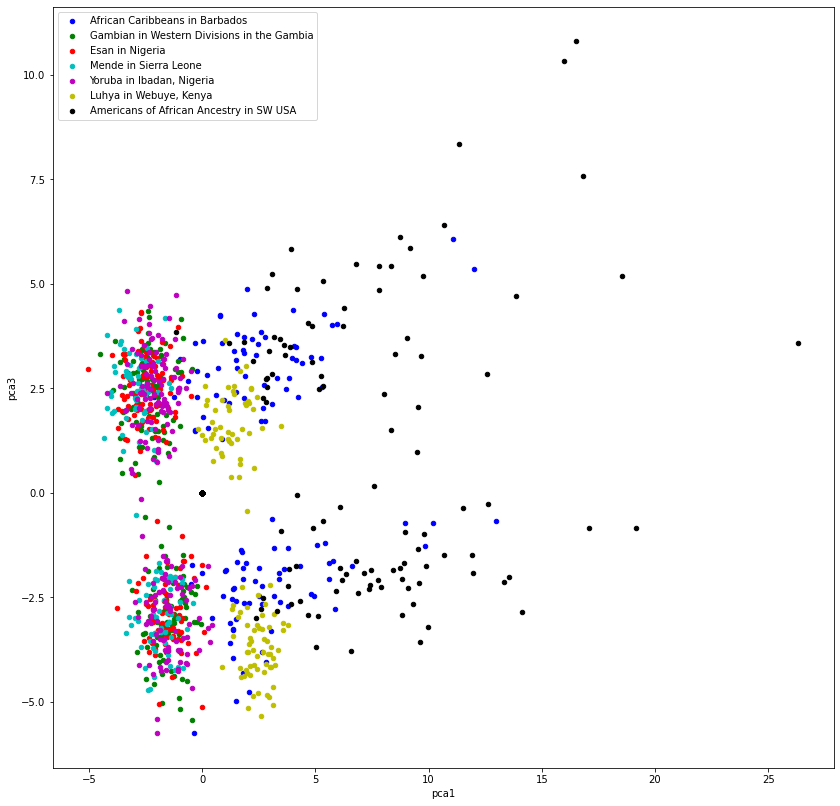

In [76]:
fig, ax = plt.subplots(figsize=(14,14))


ax.scatter(x1*ACB, x3*ACB, s=20, c ="b", label="African Caribbeans in Barbados")
ax.scatter(x1*GWD, x3*GWD, s=20, c ="g", label="Gambian in Western Divisions in the Gambia")
ax.scatter(x1*ESN, x3*ESN, s=20, c ="r", label="Esan in Nigeria")
ax.scatter(x1*MSL, x3*MSL, s=20, c ="c", label="Mende in Sierra Leone")
ax.scatter(x1*YRI, x3*YRI, s=20, c ="m", label="Yoruba in Ibadan, Nigeria")
ax.scatter(x1*LWK, x3*LWK, s=20, c ="y", label="Luhya in Webuye, Kenya")
ax.scatter(x1*ASW, x3*ASW, s=20, c ="k", label="Americans of African Ancestry in SW USA")

plt.xlabel("pca1")
plt.ylabel('pca3')
ax.legend()


plt.show()
fig.savefig("PC1y3.png")

4) PC1y3.png
De repente ciertos clusters se fusionaron en uno mismo y quedan indistinguibles las divisiones.
Los clusters se notan alargados respecto a PC3 pero compactos a lo largo de PC1, con excepción de los afroamericanos, dispersos en ambos sentidos.
A su vez, los clusters parecen partirse cuando el PC3 se acerca a 0, por lo que ese no es un valor frecuente de PC3. En PC1 sucede en menor medida o es más discreto, en el gráfico anterior no parece suceder. ¿Qué puede ser?

In [64]:
#Separamos la data por sexo
#sexos = metadata[:,1]
#print(sexos)
#sexo_dict = {
##    '1' : 'hombre',
#    '2' : 'mujer'
#}
#print(sexo_dict)


#print(hombres)
#print(sexo_dict.keys())

sexos = metadata[:,1] 
#nombramos la 3ra columna [2] de la metadata "code" para ponerle los codes de las regiones que trabajemos
#recordar que la primera columna [0] es el código de la persona y la segunda [1] es el sexo (1=h, 2=m)
#print(sexos)


sexo_dict = {}
for sexo in sexos:
    sexo_dict[sexo] = [c == sexo for c in sexos]

print(sexos.shape)
#print(sexos)
print(sexo.shape)

hombres = np.asarray(sexo_dict['1'])
mujeres = np.asarray(sexo_dict['2'])

(995,)
()


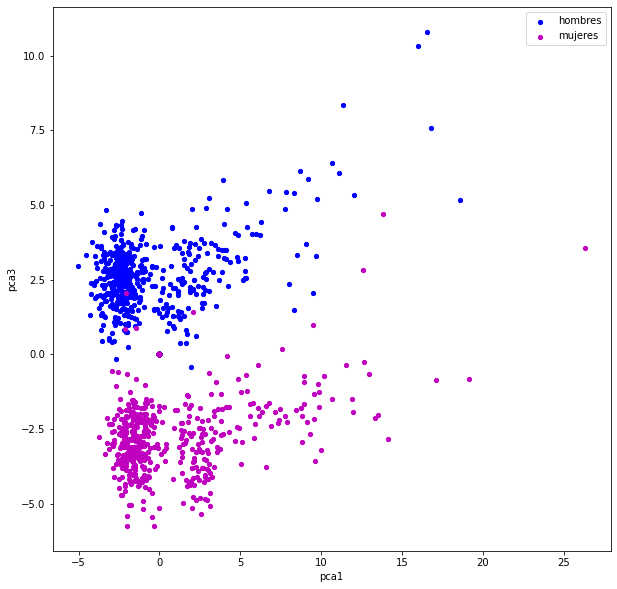

In [69]:
fig, ax = plt.subplots(figsize=(10,10))


ax.scatter(x1*hombres, x3*hombres, s=18, c ="b", label="hombres")
ax.scatter(x1*mujeres, x3*mujeres, s=18, c ="m", label="mujeres")

plt.xlabel("pca1")
plt.ylabel('pca3')
ax.legend()


plt.show()
fig.savefig("PC1y3_alt.png")

Acá podemos ver como con un nuevo gráfico en el que se discrimina por sexo en vez de por regiones, los clusters tienen más sentido que con la división regional.

# PC2 Y PC3

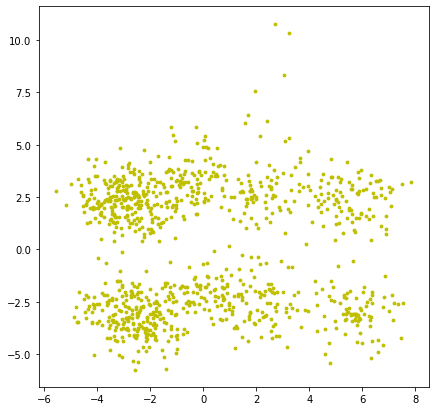

In [25]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(x2, x3, s=8, c ="y")

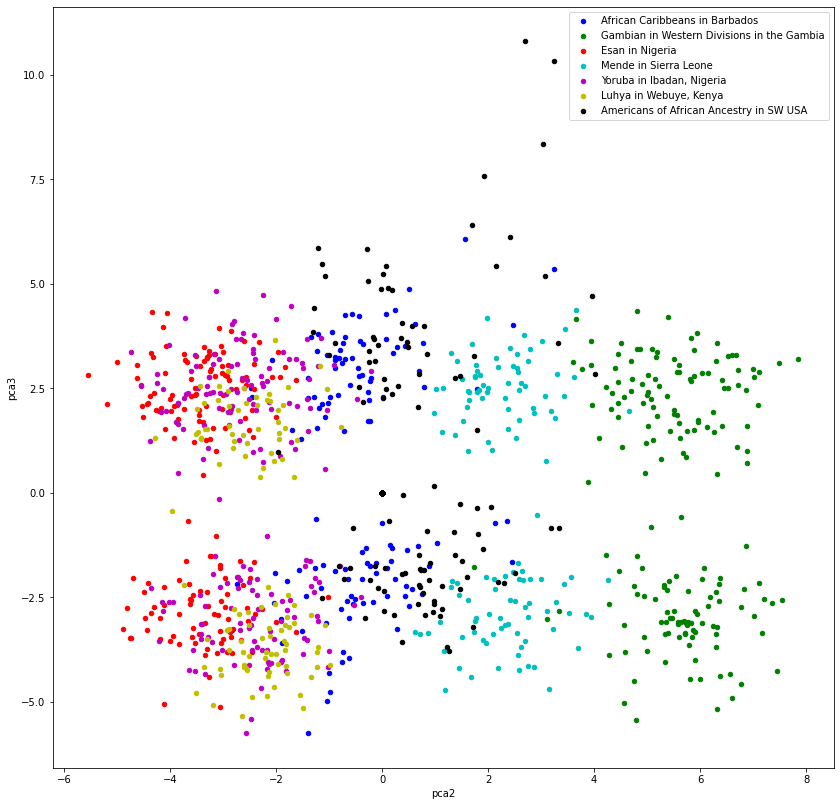

In [75]:
fig, ax = plt.subplots(figsize=(14,14))


ax.scatter(x2*ACB, x3*ACB, s=20, c ="b", label="African Caribbeans in Barbados")
ax.scatter(x2*GWD, x3*GWD, s=20, c ="g", label="Gambian in Western Divisions in the Gambia")
ax.scatter(x2*ESN, x3*ESN, s=20, c ="r", label="Esan in Nigeria")
ax.scatter(x2*MSL, x3*MSL, s=20, c ="c", label="Mende in Sierra Leone")
ax.scatter(x2*YRI, x3*YRI, s=20, c ="m", label="Yoruba in Ibadan, Nigeria")
ax.scatter(x2*LWK, x3*LWK, s=20, c ="y", label="Luhya in Webuye, Kenya")
ax.scatter(x2*ASW, x3*ASW, s=20, c ="k", label="Americans of African Ancestry in SW USA")

plt.xlabel("pca2")
plt.ylabel('pca3')
ax.legend()


plt.show()
fig.savefig("PC2y3.png")

De vuelta se nota a Gambia y Sierra Leona como clusters separados del resto
Se hace aún más evidente cómo PC3 tiene una densidad mucho menor cuando se acerca a 0 y pareciera tener dos clusters diferenciados que rodean los valores -2.5 y 2.5, que a su vez mezclan observaciones de distintas regiones

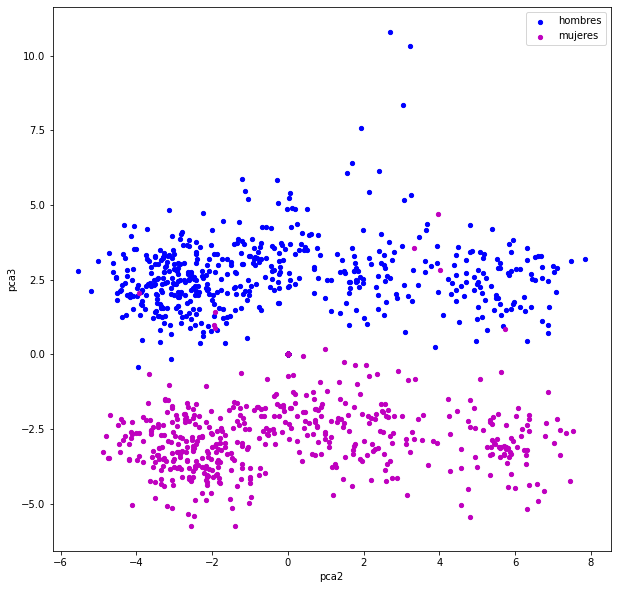

In [73]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x2*hombres, x3*hombres, s=18, c ="b", label="hombres")
ax.scatter(x2*mujeres, x3*mujeres, s=18, c ="m", label="mujeres")


plt.xlabel("pca2")
plt.ylabel('pca3')
ax.legend()


plt.show()
fig.savefig("PC2y3_alt.png")

De nuevo, la discriminación de los datos por genero tiene más sentido que la discriminación regional de los mismos.